In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# <span style="color:red">ch4. RNN(RecurrentNeuralNetwork;순환신경망)</span>
- 데이터의 순서가 중요하거나, 시계열 데이터일 경우
- 활용분야 : 번역, 음성인식, 주가예측, 가격예측

# 1. 문맥을 이용하여 모델만들기

In [1]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다
"""
text1 = "겨울이 오는 날"

In [2]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text, text1])
encoded = t.texts_to_sequences([text, text1])
print(encoded)
print(t.word_index)

[[3, 4, 1, 5, 6, 7, 1, 8, 9, 1, 10, 2, 1, 11], [12, 2, 13]]
{'말이': 1, '오는': 2, '경마장에': 3, '있는': 4, '뛰고': 5, '있다': 6, '그의': 7, '법이다': 8, '가는': 9, '고와야': 10, '곱다': 11, '겨울이': 12, '날': 13}


In [3]:
t.texts_to_sequences(['경마장에 있는 말이 뛴다'])[0]

[3, 4, 1]

In [4]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다
"""

In [5]:
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]
print(encoded)
print(t.word_index)

[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [6]:
# text를 학습시키기 위해, ['겅마장에 있는'(2,3), '경마장에 있는 말이'(2,3,1), ....]
sequences = []
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
    print('원문장 :', line, ', encoded된 문장 :', encoded)
    for i in range(0, len(encoded)-1): # 시작 index
        for j in range(i+2, len(encoded)+1): # 끝나는 인덱스 +1
            sequences.append(encoded[i:j])
print('sequences와 해석')
for sequence in sequences:
#     print(sequence)
    for word_seq in sequence:
        for key, value in t.word_index.items():
            if word_seq==value:
                print("{},{}".format(word_seq, key), end=' ')
                break
    print()

원문장 : 경마장에 있는 말이 뛰고 있다 , encoded된 문장 : [2, 3, 1, 4, 5]
원문장 : 그의 말이 법이다 , encoded된 문장 : [6, 1, 7]
원문장 : 가는 말이 고와야 오는 말이 곱다 , encoded된 문장 : [8, 1, 9, 10, 1, 11]
원문장 :  , encoded된 문장 : []
sequences와 해석
2,경마장에 3,있는 
2,경마장에 3,있는 1,말이 
2,경마장에 3,있는 1,말이 4,뛰고 
2,경마장에 3,있는 1,말이 4,뛰고 5,있다 
3,있는 1,말이 
3,있는 1,말이 4,뛰고 
3,있는 1,말이 4,뛰고 5,있다 
1,말이 4,뛰고 
1,말이 4,뛰고 5,있다 
4,뛰고 5,있다 
6,그의 1,말이 
6,그의 1,말이 7,법이다 
1,말이 7,법이다 
8,가는 1,말이 
8,가는 1,말이 9,고와야 
8,가는 1,말이 9,고와야 10,오는 
8,가는 1,말이 9,고와야 10,오는 1,말이 
8,가는 1,말이 9,고와야 10,오는 1,말이 11,곱다 
1,말이 9,고와야 
1,말이 9,고와야 10,오는 
1,말이 9,고와야 10,오는 1,말이 
1,말이 9,고와야 10,오는 1,말이 11,곱다 
9,고와야 10,오는 
9,고와야 10,오는 1,말이 
9,고와야 10,오는 1,말이 11,곱다 
10,오는 1,말이 
10,오는 1,말이 11,곱다 
1,말이 11,곱다 


In [7]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [3, 1],
 [3, 1, 4],
 [3, 1, 4, 5],
 [1, 4],
 [1, 4, 5],
 [4, 5],
 [6, 1],
 [6, 1, 7],
 [1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11],
 [1, 9],
 [1, 9, 10],
 [1, 9, 10, 1],
 [1, 9, 10, 1, 11],
 [9, 10],
 [9, 10, 1],
 [9, 10, 1, 11],
 [10, 1],
 [10, 1, 11],
 [1, 11]]

In [23]:
my_len = max([len(sequence) for sequence in sequences])
my_len

6

In [9]:
# sequences를 훈련가능하도록 6(my_len)개열로 조정
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences=sequences,
                                maxlen=my_len,
                                #padding='post' 
                                padding='pre') # 상황에 맞게 특별한 규칙은 없음
type(padded_sequences), padded_sequences.shape, padded_sequences

(numpy.ndarray,
 (28, 6),
 array([[ 0,  0,  0,  0,  2,  3],
        [ 0,  0,  0,  2,  3,  1],
        [ 0,  0,  2,  3,  1,  4],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  3,  1],
        [ 0,  0,  0,  3,  1,  4],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  1,  4],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  0,  4,  5],
        [ 0,  0,  0,  0,  6,  1],
        [ 0,  0,  0,  6,  1,  7],
        [ 0,  0,  0,  0,  1,  7],
        [ 0,  0,  0,  0,  8,  1],
        [ 0,  0,  0,  8,  1,  9],
        [ 0,  0,  8,  1,  9, 10],
        [ 0,  8,  1,  9, 10,  1],
        [ 8,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  1,  9],
        [ 0,  0,  0,  1,  9, 10],
        [ 0,  0,  1,  9, 10,  1],
        [ 0,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  9, 10],
        [ 0,  0,  0,  9, 10,  1],
        [ 0,  0,  9, 10,  1, 11],
        [ 0,  0,  0,  0, 10,  1],
        [ 0,  0,  0, 10,  1, 11],
        [ 0,  0,  0,  0,  1, 11]]))

In [10]:
# 독립변수(X)와 타겟변수(y)로 분리
X = padded_sequences[:, :-1]
y = padded_sequences[:, -1]
X.shape, y.shape

((28, 5), (28,))

In [11]:
# 단어 갯수
vocab_size = len(t.word_index)
# X를 임베딩작업을 할 때 input_dim
input_dim = vocab_size + 1
input_dim

12

In [12]:
# 타겟변수(y)의 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, vocab_size+1)
Y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [13]:
X.shape, Y.shape, vocab_size

((28, 5), (28, 12), 11)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# 2. 모델 생성하기
model = Sequential()
# 원핫인코딩한 희소행렬을 임베딩 벡터로 변환(X=[0,8,1,9,10])
model.add(Embedding(input_dim=vocab_size+1,  # 임베딩층의 입력(원핫인코딩 dim)
                    output_dim=10,           # 임베딩층의 출력
                    input_length=X.shape[1])) # 입력 데이터 길이
model.add(SimpleRNN(32))
model.add(Dense(12, activation='softmax'))
model.summary()
# 두번째 layer의 파라미터 1376 = (10+32)*32 + 32(bias) 
# 3. 모델 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# 4. 모델 학습시키기
hist = model.fit(X, Y, epochs=300, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 10)             120       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1376      
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1/1 - 1s - loss: 2.5011 - accuracy: 0.0000e+00 - 841ms/epoch - 841ms/step
Epoch 2/300
1/1 - 0s - loss: 2.4880 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 3/300
1/1 - 0s - loss: 2.4753 - accuracy: 0.0357 - 3ms/epoch - 3ms/step
Epoch 4/300
1/1 - 0s - loss: 2.4629 - accuracy: 0.0357 - 3ms/epoch - 3ms

Epoch 95/300
1/1 - 0s - loss: 1.2358 - accuracy: 0.6071 - 4ms/epoch - 4ms/step
Epoch 96/300
1/1 - 0s - loss: 1.2245 - accuracy: 0.6071 - 5ms/epoch - 5ms/step
Epoch 97/300
1/1 - 0s - loss: 1.2134 - accuracy: 0.6071 - 4ms/epoch - 4ms/step
Epoch 98/300
1/1 - 0s - loss: 1.2023 - accuracy: 0.6071 - 6ms/epoch - 6ms/step
Epoch 99/300
1/1 - 0s - loss: 1.1914 - accuracy: 0.6071 - 3ms/epoch - 3ms/step
Epoch 100/300
1/1 - 0s - loss: 1.1806 - accuracy: 0.6071 - 4ms/epoch - 4ms/step
Epoch 101/300
1/1 - 0s - loss: 1.1699 - accuracy: 0.6071 - 3ms/epoch - 3ms/step
Epoch 102/300
1/1 - 0s - loss: 1.1594 - accuracy: 0.6071 - 4ms/epoch - 4ms/step
Epoch 103/300
1/1 - 0s - loss: 1.1489 - accuracy: 0.6071 - 4ms/epoch - 4ms/step
Epoch 104/300
1/1 - 0s - loss: 1.1386 - accuracy: 0.6071 - 3ms/epoch - 3ms/step
Epoch 105/300
1/1 - 0s - loss: 1.1284 - accuracy: 0.6071 - 3ms/epoch - 3ms/step
Epoch 106/300
1/1 - 0s - loss: 1.1184 - accuracy: 0.6071 - 2ms/epoch - 2ms/step
Epoch 107/300
1/1 - 0s - loss: 1.1085 - accur

Epoch 198/300
1/1 - 0s - loss: 0.5253 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 199/300
1/1 - 0s - loss: 0.5214 - accuracy: 0.8571 - 4ms/epoch - 4ms/step
Epoch 200/300
1/1 - 0s - loss: 0.5176 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 201/300
1/1 - 0s - loss: 0.5138 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 202/300
1/1 - 0s - loss: 0.5101 - accuracy: 0.8571 - 7ms/epoch - 7ms/step
Epoch 203/300
1/1 - 0s - loss: 0.5064 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 204/300
1/1 - 0s - loss: 0.5027 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 205/300
1/1 - 0s - loss: 0.4991 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 206/300
1/1 - 0s - loss: 0.4956 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 207/300
1/1 - 0s - loss: 0.4921 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 208/300
1/1 - 0s - loss: 0.4886 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 209/300
1/1 - 0s - loss: 0.4852 - accuracy: 0.8571 - 3ms/epoch - 3ms/step
Epoch 210/300
1/1 - 0s - loss: 0.4818 - 

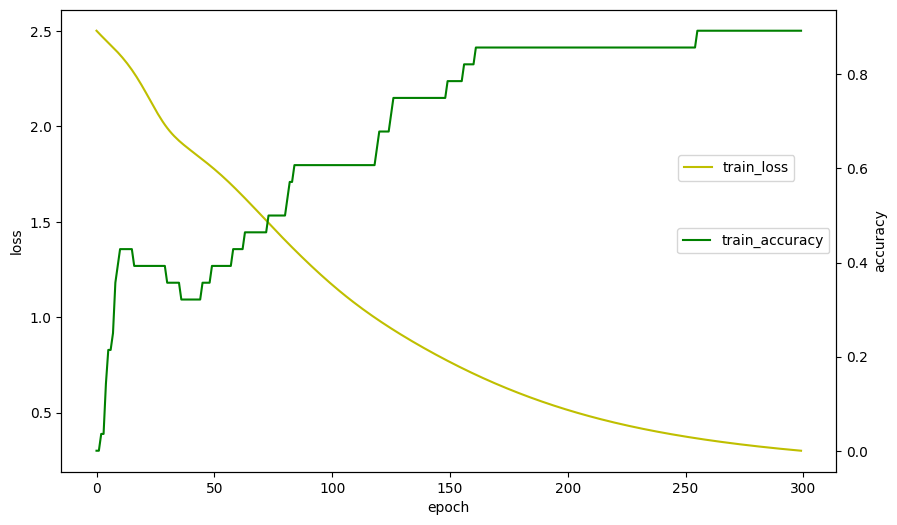

In [15]:
# 5. 모델 평가
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [21]:
# 6. 모델 사용하기(경마장에 -> 있는)
encoded = t.texts_to_sequences(['경마장에'])[0]
input_data = pad_sequences([encoded], maxlen=my_len, padding='pre')
result = model.predict(input_data, verbose=0).argmax()
print('모델이 예측 결과 :', result)
for key, value in t.word_index.items():
    if value==result:
        print('예측한 단어 :', key)
        break

모델이 예측 결과 : 3
예측한 단어 : 있는


In [59]:
encoded = t.texts_to_sequences(['겨울은'])[0]
encoded

[]

In [22]:
# 6. 모델 사용하기(사용자로부터 입력받은 문자 -> ?)
encoded = t.texts_to_sequences(['겨울은'])[0]
input_data = pad_sequences([encoded], maxlen=my_len, padding='pre')
result = model.predict(input_data, verbose=0).argmax()
print('모델이 예측 결과 :', result)
for key, value in t.word_index.items():
    if value==result:
        print('예측한 단어 :', key)
        break

모델이 예측 결과 : 11
예측한 단어 : 곱다


# 2. 다음 문맥 예측해 보기

In [32]:
# "경마장에"이후에 단어 4개의 문맥을 만들어줘
def sentence_generation(model, current_word, n):
    print('입력된 단어 :', current_word)
    for i in range(1, n+1):
        print(i, '번째 current_word :', current_word)
        encoded = t.texts_to_sequences([current_word])
        input_data = pad_sequences(encoded, maxlen=my_len-1, padding='pre')
        result = model.predict(input_data, verbose=0).argmax()
        for word, index in t.word_index.items():
            if result==index:
                print("{}번째 예측 {} : {}".format(i,result,word))
                current_word = current_word + ' '+word
                break # 안에 for문 break

In [33]:
sentence_generation(model, "경마장에", 4)

입력된 단어 : 경마장에
1 번째 current_word : 경마장에
1번째 예측 3 : 있는
2 번째 current_word : 경마장에 있는
2번째 예측 1 : 말이
3 번째 current_word : 경마장에 있는 말이
3번째 예측 4 : 뛰고
4 번째 current_word : 경마장에 있는 말이 뛰고
4번째 예측 5 : 있다
